# Práctica 2

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import numpy as np

import colorsys
import imageio
from skimage import exposure

# Default image path
img_path = "../img"

# Matplotlib plot size
plt.rcParams['figure.figsize'] = (15,15)

# Ignore all wanings
# TODO: Remove warnings
import warnings
warnings.filterwarnings('ignore')

### Funciones utilizadas a lo largo de práctica

Para realizar la práctica, fue elegido el espacio de color **HSV**, en vez de **HSI**, el cual fue visto en clase. La deicisión se basó en que ya existe una librería de Python, *colorsys*, la cual posee la conversión de RGB a HSV, y viceversa implementada y validada.

La principal diferencia entre ambos espacios radica en la dimensión que representa la luminosidad de la imágen, en estos caso, **V**, o valor, e **I**, o intensidad. 

En el caso de HSV, la misma se computa como:

$\begin{align}
max(r,g,b)
\end{align}$

Por otro lado, en HSI se compua como:

$\begin{align}
\frac{r+g+b}{3}
\end{align}$

In [8]:
# Image helpers

def readImageAsRGB(routeToImage):
    """ Loads an image, compress its values to the [0,1] range, and drop alpha channel """
    img = imageio.imread(routeToImage)
    # Make image value rangeo from [0,255] to [0,1]
    img = img/255
    # Drop alpha channel
    img = img[:,:,(0,1,2)]
    return img

def scaleSaturation(img, c):
    """ 
        Scale saturation channel (channel 1 of (0,1,2)) by a constant c.
        The operation is not permormed in place, so a copy of the scaled 
        image is returned.
    """
    # TODO: Add clipping?
    copy = img.copy()
    copy[:,:,1] = copy[:,:,1] * c
    return copy

In [9]:
# Plot helpers

def show(ax, img, title = None):
    ax.imshow(img)
    ax.axis("off")
    if title is not None:
        ax.set_title(title)
        
def RGBHistogram(ax, img):
    """
        Plots an histogram for each channel in img, being img an RGB image.
        The channel's histograms are each one plotted on top of each other.
    """
    ax.hist(np.clip(img[:,:,0] * 256, 0, 255).ravel(),bins=256, histtype="step", color="r", density=True)
    ax.hist(np.clip(img[:,:,1] * 256, 0, 255).ravel(),bins=256, histtype="step", color="g", density=True)
    ax.hist(np.clip(img[:,:,2] * 256, 0, 255).ravel(),bins=256, histtype="step", color="b", density=True)
    ax.set_xlim((0,255))

### 1) Realce de la saturación

#### a) Multiplicar por una constante c > 1 cada pixel en el plano de la saturación. Ver que esto aumenta la intensidad aparente. Si c < 1 ver que reduce la intensidad del color.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


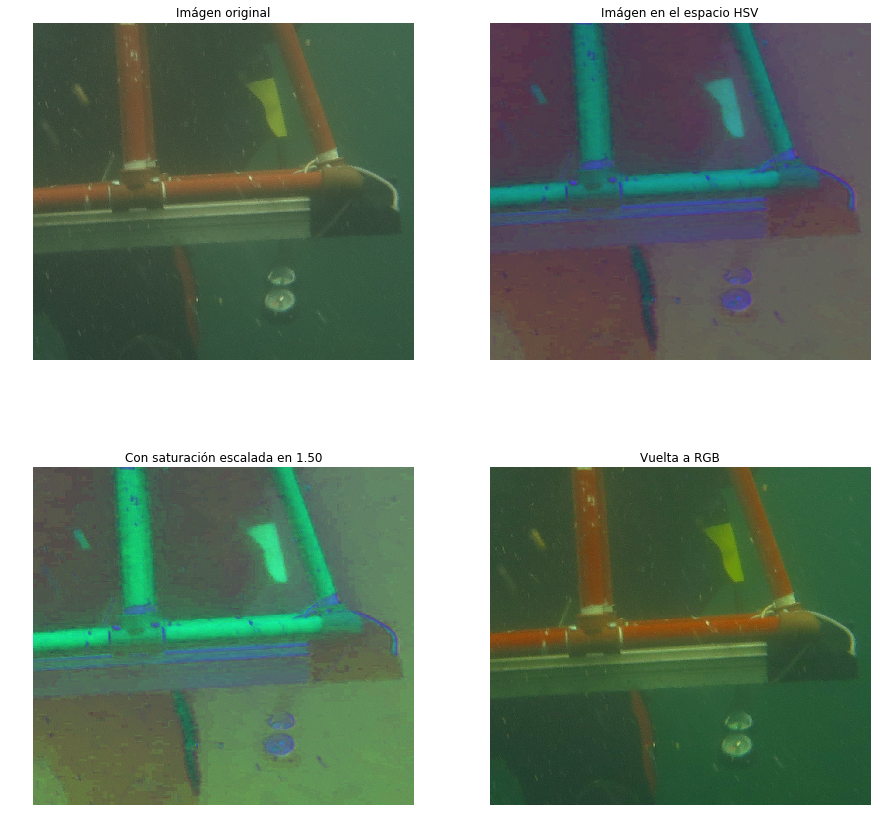

In [10]:
img = readImageAsRGB(img_path + "/ImagenesColor/1907xx.png")
imgAsHSV = colors.rgb_to_hsv(img)
    
saturationScale = 1.5
imgAsHSVWithScaledSaturation = scaleSaturation(imgAsHSV, saturationScale)
imgBackToRGB = colors.hsv_to_rgb(imgAsHSVWithScaledSaturation)

fig, ax = plt.subplots(nrows=2, ncols=2)
show(ax[0,0], img, title = "Imágen original")
show(ax[0,1], imgAsHSV, title = "Imágen en el espacio HSV")
show(ax[1,0], imgAsHSVWithScaledSaturation, title = "Con saturación escalada en %.2f" % (saturationScale))
show(ax[1,1], imgBackToRGB , title = "Vuelta a RGB")

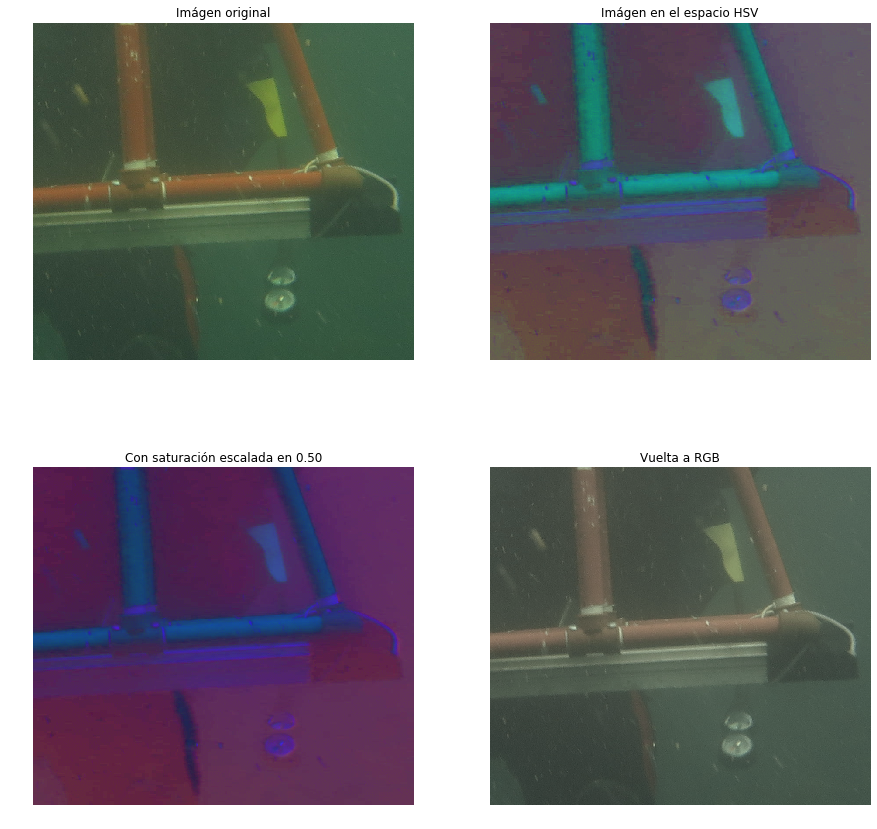

In [11]:
saturationScale = 0.5
imgAsHSVWithScaledSaturation = scaleSaturation(imgAsHSV, saturationScale)
imgBackToRGB = colors.hsv_to_rgb(imgAsHSVWithScaledSaturation)

fig, ax = plt.subplots(nrows=2, ncols=2)
show(ax[0,0], img, title = "Imágen original")
show(ax[0,1], imgAsHSV, title = "Imágen en el espacio HSV")
show(ax[1,0], imgAsHSVWithScaledSaturation, title = "Con saturación escalada en %.2f" % (saturationScale))
show(ax[1,1], imgBackToRGB , title = "Vuelta a RGB")

#### b) Realizar diferentes transformaciones lineales y no lineales al canal de saturación y ver el balance de colores.

La transformación (no lineal) aplicada al canal de saturación fue una corrección logartimica del mismo (*logarithmic correction*), es decir: 

$O = gain * log( 1 + I )$

Con $I$ el valor de saturación de un pixel, y $gain$, la intensidad de la transformación realizada.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


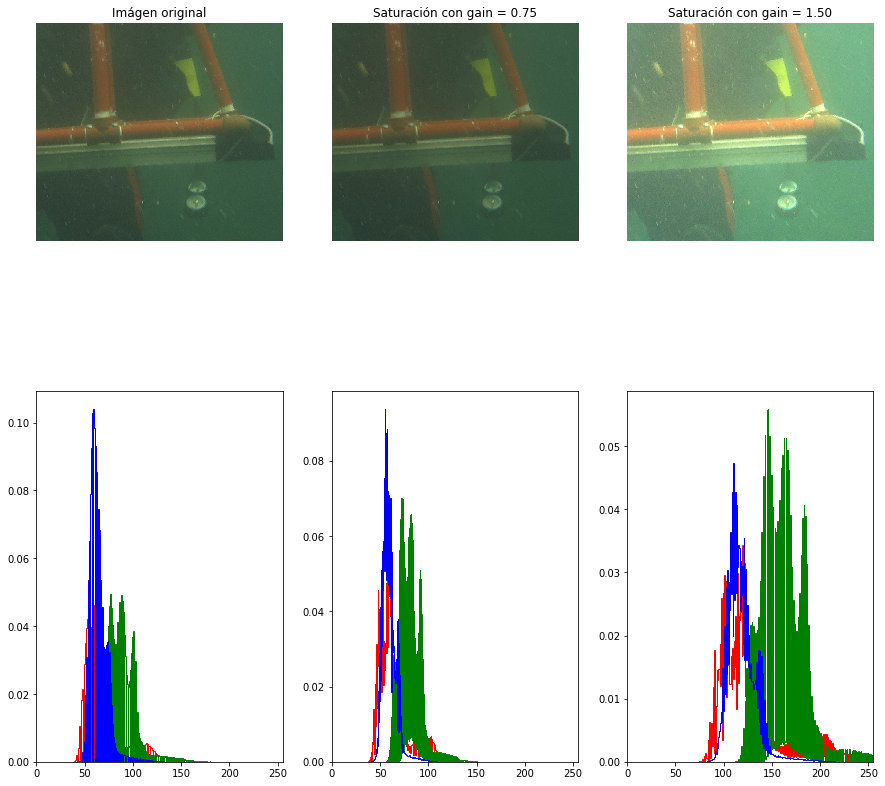

In [12]:
gain_1 = 0.75
gain_2 = 1.5

def applyLogTransformToSaturation(imgAsHSV, gain):
    imageWithLogAdjustmentInSaturaion = imgAsHSV.copy()
    imageWithLogAdjustmentInSaturaion[:,:,2] = exposure.adjust_log(imageWithLogAdjustmentInSaturaion[:,:,2], gain=gain)
    imgBackToRGB = colors.hsv_to_rgb(imageWithLogAdjustmentInSaturaion)
    return imgBackToRGB

firstGainCorrectedImage = applyLogTransformToSaturation(imgAsHSV, gain_1)
secondGainCorrectedImage = applyLogTransformToSaturation(imgAsHSV, gain_2)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,15))

show(ax[0,0], img, title="Imágen original")
RGBHistogram(ax[1,0], img)

show(ax[0,1], firstGainCorrectedImage, title="Saturación con gain = %.2f" % (gain_1))
RGBHistogram(ax[1,1], firstGainCorrectedImage)

show(ax[0,2], secondGainCorrectedImage, title="Saturación con gain = %.2f" % (gain_2))
RGBHistogram(ax[1,2], secondGainCorrectedImage)

### 2) Alteración del Hue

#### a) Sumar la constante c a los valores del canal H y ver el efecto en los colores cuando c es muy chico y qué sucede cuando c es muy grande.

#### b) Observación: tratar los valores de gris como periódicos ya que Hue es angular. Si tenemos 8 bits entonces 255 + 1 = 0 y 0 - 1 = 255

### 3) Observaciones

#### a) Ver en cuál de los canales son más visibles los detalles y en cuáles es más distinguible un granulado en una imagen.

#### b) Ver a cuál de los canales afectan más los bordes difuminados.